In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

## Task 1: What is the relationship between hours worked and exam results?

Some might say that the more hous you log, the better your exam scores are. Is that really true?

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# TODO: Implement Linear Regression from scratch
class LinearRegression:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass


class LinearRegression:
    def __init__(self, learning_rate=0.00001, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        y = np.array(y)
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1 / n_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        return np.dot(X, self.weights) + self.bias
    

/var/folders/ys/3_k_tbw50xx72_x4yzy7vwhh0000gn/T/ipykernel_41090/33863056.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


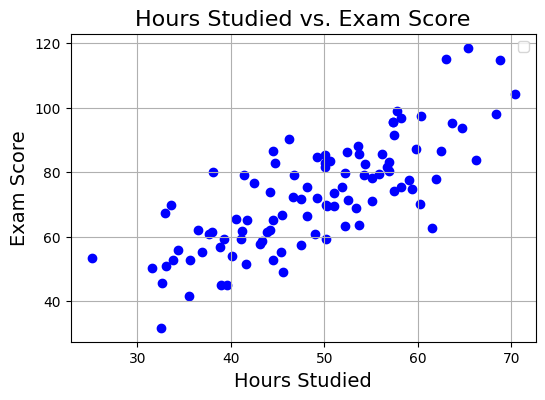

In [4]:
# Data
data = pd.read_csv('regression_data/mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['hours_studied'], data['exam_score'], c='blue')
plt.grid(True)
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title('Hours Studied vs. Exam Score', fontsize=16)
plt.legend()
plt.show()

In [5]:
data.shape
print(data)

    hours_studied  exam_score
0       32.502345   31.707006
1       53.426804   68.777596
2       61.530358   62.562382
3       47.475640   71.546632
4       59.813208   87.230925
..            ...         ...
95      50.030174   81.536991
96      49.239765   72.111832
97      50.039576   85.232007
98      48.149859   66.224958
99      25.128485   53.454394

[100 rows x 2 columns]


In [6]:
lr = LinearRegression()

X = data[['hours_studied']]
y = data['exam_score']

print(X.shape)
print(y.shape)

lr.fit(X, y)

preds = lr.predict(X)

(100, 1)
(100,)


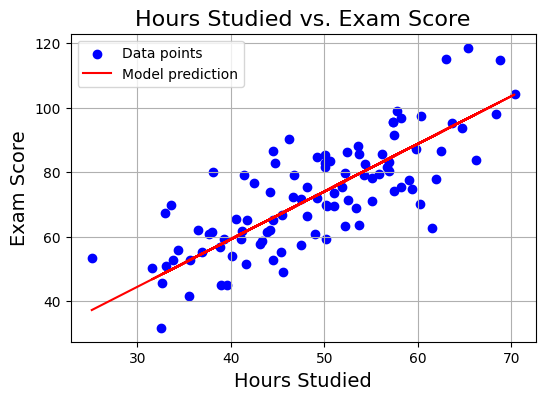

In [7]:
# Plot the data and the model prediction
plt.figure(figsize=(6, 4))
plt.scatter(data['hours_studied'], data['exam_score'], c='blue', label='Data points')
plt.plot(data['hours_studied'], preds, c='red', label='Model prediction')
plt.grid(True)
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title('Hours Studied vs. Exam Score', fontsize=16)
plt.legend()
plt.show()

### Finding the implied relationship between Hours Studied and Exam Score

In [8]:
print('Slope:', lr.weights)
print('Intercept:', lr.bias)
print("Formula: y = {:.2f}x + {:.2f}".format(lr.weights[0], lr.bias))

Slope: [1.47880272]
Intercept: 0.03507494906343607
Formula: y = 1.48x + 0.04



## 🧠 Task 2: Logistic Regression for Binary Classification

### Mission
1. From your Linear Regression model, make a Logistic Regressio model that performs binary classification
2. Look into how you can use feature engineering to improve the accuracy

**Performance goal**: 0.88 accuracy on the test set

In [9]:
data = pd.read_csv('regression_data/mission2.csv')

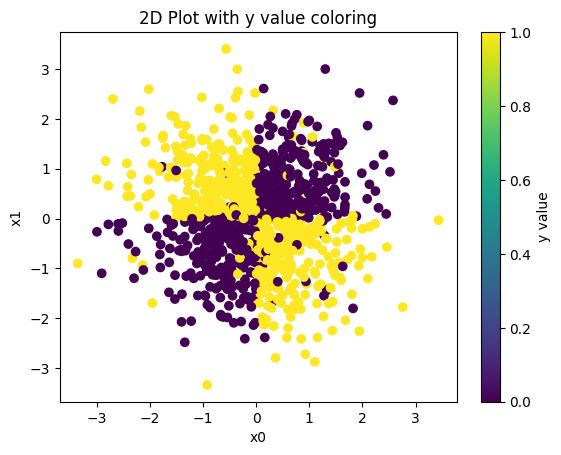

In [10]:
df = data 


# Plotting
plt.scatter(df['x0'], df['x1'], c=df['y'], cmap='viridis')
plt.colorbar(label='y value')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('2D Plot with y value coloring')
plt.show()

In [11]:
import numpy as np

# Polynomial Features
data['x0^2'] = data['x0'] ** 2
data['x1^2'] = data['x1'] ** 2
data['x0*x1'] = data['x0'] * data['x1']

# Quadrant Feature
data["sign"] = np.sign(data['x0']) * np.sign(data['x1'])

In [12]:
data

,x0,x1,y,split,x0^2,x1^2,x0*x1,sign
0,0.377044,0.587023,0.0,train,0.142162,0.344596,0.221333,1.0
1,-1.222865,1.514124,1.0,train,1.495399,2.292571,-1.851569,-1.0
2,-0.036282,-1.562136,0.0,train,0.001316,2.440267,0.056678,1.0
3,-1.217459,0.151372,1.0,train,1.482205,0.022914,-0.184290,-1.0
4,0.072188,0.503239,0.0,train,0.005211,0.253250,0.036328,1.0
...,...,...,...,...,...,...,...,...
995,-0.321591,-0.221557,0.0,test,0.103421,0.049087,0.071251,1.0
996,-1.331425,-0.643386,0.0,test,1.772694,0.413945,0.856620,1.0
997,-0.411979,0.526119,1.0,test,0.169727,0.276802,-0.216750,-1.0
998,-0.130589,2.077277,1.0,test,0.017053,4.315080,-0.271270,-1.0


In [13]:
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [14]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y, lr=0.01, epochs=1000):
        self.w = np.random.randn(X.shape[1])
        self.b = np.random.randn()

        for _ in range(epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

            dw = np.dot(X.T, (y_pred - y)) / X.shape[0]
            db = np.mean(y_pred - y)

            self.w -= lr * dw
            self.b -= lr * db

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        return y_pred


### Initial poor performance

We see that the model achieves a poor performance when only using the two default signals. This is because the data is separable by a hyperplane in two dimensions.

### Improvements
In order to make the data linearly separable, we can add some features. From the plot above, we see that the class of the data is highly dependent on which quadrant/sign the features x0 and x1 has. Adding features like x0*x1, distance from origin (r) and sign gives a much butter result. 

### Models inductive bias

The models inductive bias is that the data is linearly separable. If it is not, then the model will perform poorly. 

In [15]:


lr = LogisticRegression()

features = ["x0", "x1"]
target = "y"

lr.fit(train[features].values, train[target].values)
train_preds = lr.predict(train[features].values)
test_preds = lr.predict(test[features].values)

train_preds = np.where(train_preds > 0.4, 1, 0)
test_preds = np.where(test_preds > 0.4, 1, 0)

train_accuracy = np.mean(train_preds == train[target])
test_accuracy = np.mean(test_preds == test[target])

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')



Train accuracy: 0.548
Test accuracy: 0.518


In [16]:
lr = LogisticRegression()

features = ["x0", "x1", "x0*x1", "sign"]
target = "y"

lr.fit(train[features].values, train[target].values)
train_preds = lr.predict(train[features].values)
test_preds = lr.predict(test[features].values)

train_preds = np.where(train_preds > 0.5, 1, 0)
test_preds = np.where(test_preds > 0.5, 1, 0)

train_accuracy = np.mean(train_preds == train[target])
test_accuracy = np.mean(test_preds == test[target])

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')



Train accuracy: 0.942
Test accuracy: 0.948


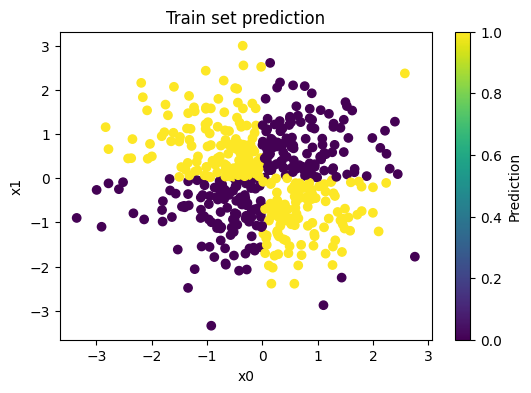

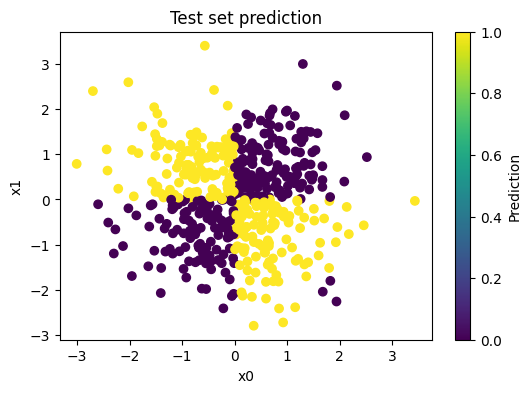

In [17]:
# Plot the predictions
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train_preds, cmap='viridis')
plt.colorbar(label='Prediction')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Train set prediction')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(test['x0'], test['x1'], c=test_preds, cmap='viridis')
plt.colorbar(label='Prediction')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Test set prediction')
plt.show()



### Solving using Decision Tree Classifier

When solving using the decision tree classifier, it is able to separate the data. This is because the decision tree classifier can make non-linear decision boundaries.

In [18]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=8)

# Define features and target
features = ["x0", "x1"]
target = "y"

# Fit the model
dt.fit(train[features].values, train[target].values)

# Predict on training and test data
train_preds = dt.predict(train[features].values)
test_preds = dt.predict(test[features].values)

# Calculate accuracy
train_accuracy = np.mean(train_preds == train[target])
test_accuracy = np.mean(test_preds == test[target])

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Train accuracy: 0.992
Test accuracy: 0.888


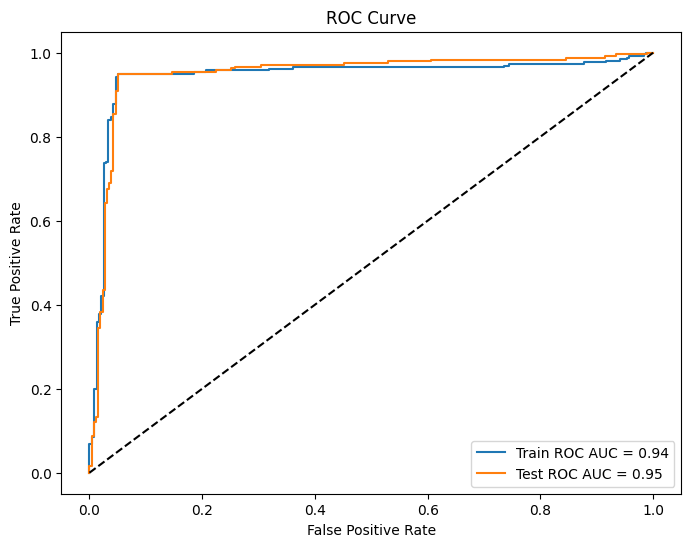

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming lr, train, and test are already defined
lr = LogisticRegression()

features = ["x0*x1", "sign"]
target = "y"

lr.fit(train[features].values, train[target].values)
train_probs = lr.predict(train[features].values)
test_probs = lr.predict(test[features].values)


# Calculate ROC curve and AUC score for training data
train_fpr, train_tpr, _ = roc_curve(train[target], train_probs)
train_auc = roc_auc_score(train[target], train_probs)

# Calculate ROC curve and AUC score for test data
test_fpr, test_tpr, _ = roc_curve(test[target], test_probs)
test_auc = roc_auc_score(test[target], test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC AUC = {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, label=f'Test ROC AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()